# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Untuk memproses data algoritma K-means Clustering , data dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid.

---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/cronousz/sanbercode-class-data-science/main/WEEK%204/dataset/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [20]:
#code here
df.ffill(inplace=True)
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [12]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final
                                      

In [22]:
print(finding_outlier(df['Umur']))
print(finding_outlier(df['Skor Belanja (1-100)']))

249    120.0
Name: Umur, dtype: float64
16    150.0
Name: Skor Belanja (1-100), dtype: float64


In [23]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final
                    

In [25]:
df = remove_outlier(df[['Umur', 'Skor Belanja (1-100)']])

df.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


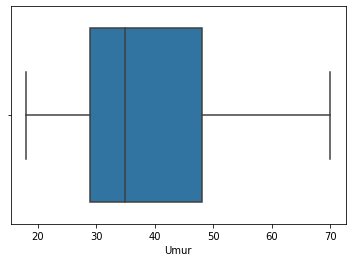

In [31]:
sns.boxplot('Umur', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


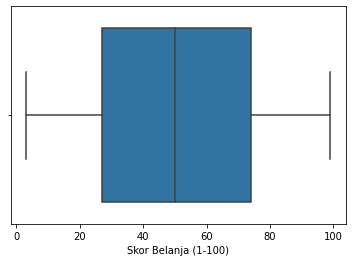

In [30]:
sns.boxplot('Skor Belanja (1-100)', data=df)

In [37]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df)
df_std

array([[-1.45500539e+00, -3.96406732e-01],
       [-1.30421503e+00,  1.11936879e+00],
       [-1.37961021e+00, -1.58737321e+00],
       [-1.15342467e+00,  9.75009217e-01],
       [-5.50263218e-01, -3.60316839e-01],
       [-1.22881985e+00,  9.38919323e-01],
       [-2.48682493e-01, -1.58737321e+00],
       [-1.15342467e+00,  1.58853740e+00],
       [ 1.93777776e+00, -1.69564289e+00],
       [-6.25658399e-01,  7.94559750e-01],
       [ 2.16396331e+00, -1.29865407e+00],
       [-2.48682493e-01,  1.76898687e+00],
       [ 1.48540668e+00, -1.26256417e+00],
       [-1.07802949e+00,  9.75009217e-01],
       [-9.78921305e-02, -1.33474396e+00],
       [-1.22881985e+00,  1.04718900e+00],
       [-1.37961021e+00,  5.78020389e-01],
       [ 1.03303559e+00, -7.57305666e-01],
       [-2.48682493e-01,  1.73289698e+00],
       [-2.48682493e-01, -5.40766306e-01],
       [-1.00263431e+00,  8.30649643e-01],
       [ 5.80664501e-01, -1.62346311e+00],
       [-5.50263218e-01,  8.30649643e-01],
       [ 1.

In [44]:
#Clustering with KMeans

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1
kmeans1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [45]:
new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['label1_kmeans'] = labels1

In [46]:
new_df

,Umur,Skor Belanja (1-100),label1_kmeans
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


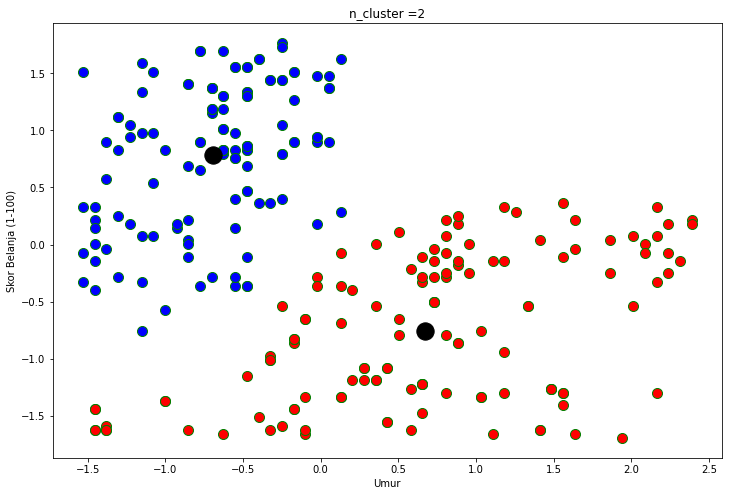

In [70]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label1_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.title('n_cluster =2')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.show()

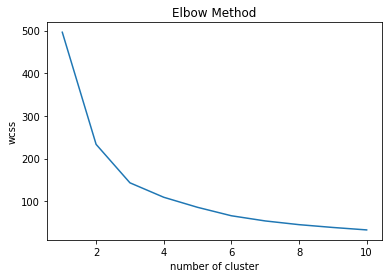

In [59]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')

plt.show()

In [58]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0], dtype=int32)

In [61]:
new_df['label2_kmeans'] = labels2
new_df

,Umur,Skor Belanja (1-100),label1_kmeans,label2_kmeans
0,-1.455005,-0.396407,0,2
1,-1.304215,1.119369,0,0
2,-1.379610,-1.587373,1,2
3,-1.153425,0.975009,0,0
4,-0.550263,-0.360317,0,2
...,...,...,...,...
243,-0.851844,0.686290,0,0
244,1.560802,-1.298654,1,1
245,-0.248682,1.444178,0,0
246,-0.097892,-0.649036,1,2


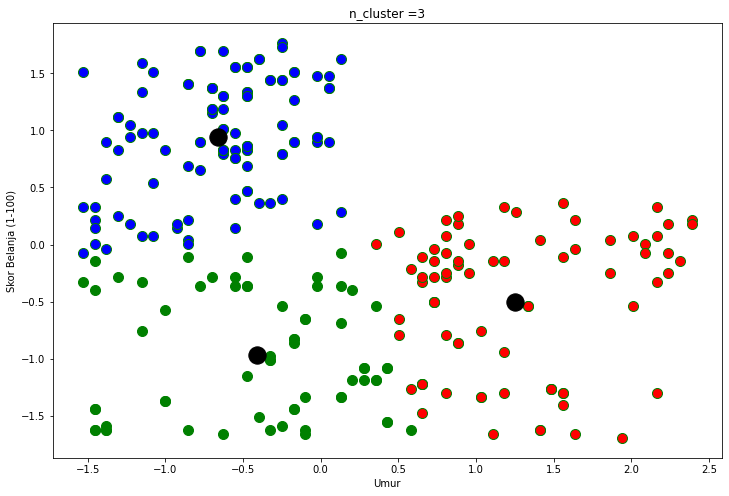

In [75]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label2_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 2], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 3], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 3], c='yellow', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.title('n_cluster =3')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: 